## In the following notebook we will be analyzing the dataset of an employee in a company and will be predicting whether the an employee will retain or leave the company
## the dataset has been downloaded from www.kaggle.com/giripujar/hr-analytics



lets begin by importing the pandas for reading the dataset,handling the missing data and analyzing it.   
matplot will be imported to plot the different graph  
numpy will be imported to do array calculation   

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

lets locate the data in directory using the cd command in my case teh data in C:\Users\shaikh\Desktop\New folder\dataset\hr
but in your case data will be somewhere else more sure you have correct directory

In [2]:
cd C:\Users\shaikh\Desktop\New folder\dataset\hr

C:\Users\shaikh\Desktop\New folder\dataset\hr


## lets begin with exploring the dataset
lets begin with reading the dataser using the pd.read command

In [3]:
df=pd.read_csv('HR_comma_sep.csv',sep=',')

displaying the first five content of the dataset

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.shape

(14999, 10)

our dataset has 14999 rows and 10 columns

checking whether our dataset contain any null value fortunately we dont have any. if we have null value then we can drop it by using the drop method

In [6]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [7]:
d=df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']].values


identifying any nan value in our dataset

In [8]:
import numpy as np
np.isnan(d).any()


False

we dont have any nan

checking the number of unique department

In [9]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

let begin with the question over here the question is whether a person will going to leave the company or he will retain in the company on a given condition. The condition are the feature in the given dataset .
Naturally the answer will be yes or no which in the dataset is given by 0 and 1    
overhere 0 mean the employe will not leave the company where as 1 mean that the employee will gonna leave the company

In [13]:
retain=df['left']==1 
retain=df[retain]
print(retain.shape)
no_of_emp_retain=retain.shape[0]
retain.head()

(3571, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [27]:
left=df['left']==0
left=df[left]
print(left.shape)
no_of_emp_left=left.shape[0]
left.head()

(11428, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


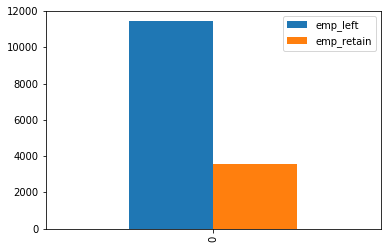

In [26]:
series={'emp_left':pd.Series([no_of_emp_left],[0]),'emp_retain':pd.Series([no_of_emp_retain],[0])}
dataframe=pd.DataFrame(series)
dataframe
dataframe.plot(kind='bar')

from the above bar graph its clear that more people have leave the company 

in the dataframe the target column is the left columns because that the column that will give us the information that the employee will leave or retain on the given condition 
so we will group our dataframe by left columns and take its mean

(array([ 367., 1240., 2733., 1722., 1628., 1712., 1906., 2240., 1127.,
         324.]),
 array([ 96. , 117.4, 138.8, 160.2, 181.6, 203. , 224.4, 245.8, 267.2,
        288.6, 310. ]),
 <a list of 10 Patch objects>)

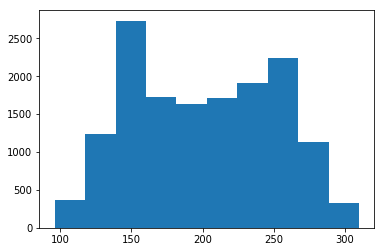

In [41]:
plt.hist(df['average_montly_hours'])

In [15]:
average=df.groupby(df['left']).mean()
average

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#### Inference from the above result
the average score of the satisfaction level, average monthly hour ,time spend in the company,promotion last five year had a great impact whether a employee will retain or leave the company. Whereas last evaluation, no of prject,work accident doesnt seems to have a great impact

lets find the frequency of the people left from different department and plotting  its graph

In [16]:
x=pd.crosstab(df['Department'],df['left'])
x

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


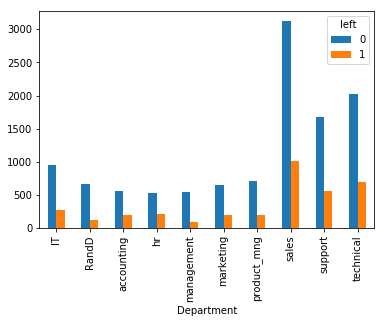

In [17]:
x.plot(kind='bar')

Doing the same for the salary

In [18]:
y=pd.crosstab(df['salary'],df['left'])
y.head()

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


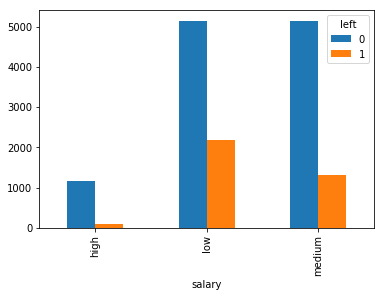

In [19]:
y.plot(kind='bar')

From the above graph its very clear that the employee who is having high salary are very less likely to leave the company where as 
people with medium and low salary are more likely to leave the company

from the above observation the feature of our choice are satisfaction_level, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years and salary

In [20]:
analyze_df=df[['satisfaction_level','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary']]
analyze_df.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,157,3,0,0,low
1,0.80,262,6,0,0,medium
2,0.11,272,4,0,0,medium
3,0.72,223,5,0,0,low
4,0.37,159,3,0,0,low


getting the dummies value for the salry columns

In [21]:
dummies_df=pd.get_dummies(analyze_df)
dummies_df.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,3,0,0,0,1,0
1,0.80,262,6,0,0,0,0,1
2,0.11,272,4,0,0,0,0,1
3,0.72,223,5,0,0,0,1,0
4,0.37,159,3,0,0,0,1,0


getting our target value for our machine leaning algorithmn

In [22]:
target=df['left'].values
data=dummies_df.values
data.shape

(14999, 8)

breaking our dataset into training and testing part where the training part will be use to train our classifier and testing part will be use to test our classifier that how well does it persom on unseen data   
here we will be using 70% of our data to train our classifier and 30% to test

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,target,stratify=target,test_size=0.3,random_state=0)
X_test.shape

(4500, 8)

since the problem is of yes or no type or genrally speking the problem is of binary classification therefore we will be using logistic regression for this problem

In [24]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

traing our model using the fit method. over here the model will learn the different parameter 

In [25]:
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

from the learn parameter we will predicting the test dataset which we have reserve earlier

In [26]:
prediction=classifier.predict(X_test)

calling the score method to check how well does our model perfrom on unseen dataset

In [27]:
classifier.score(X_test,Y_test)

0.7653333333333333

In [28]:
classifier.coef_

array([[-3.74670212e+00,  1.12636667e-03,  2.15874483e-01,
        -1.56650592e+00, -1.06898623e+00, -1.20014552e+00,
         7.40350774e-01,  1.54067691e-01]])

we will be splitting our dataset into 3 category namely tarin,cross validation and test data.  
here we will be using 5 fold cross validation since the classifier is logistic regression it will be automatically stratified k fold.  
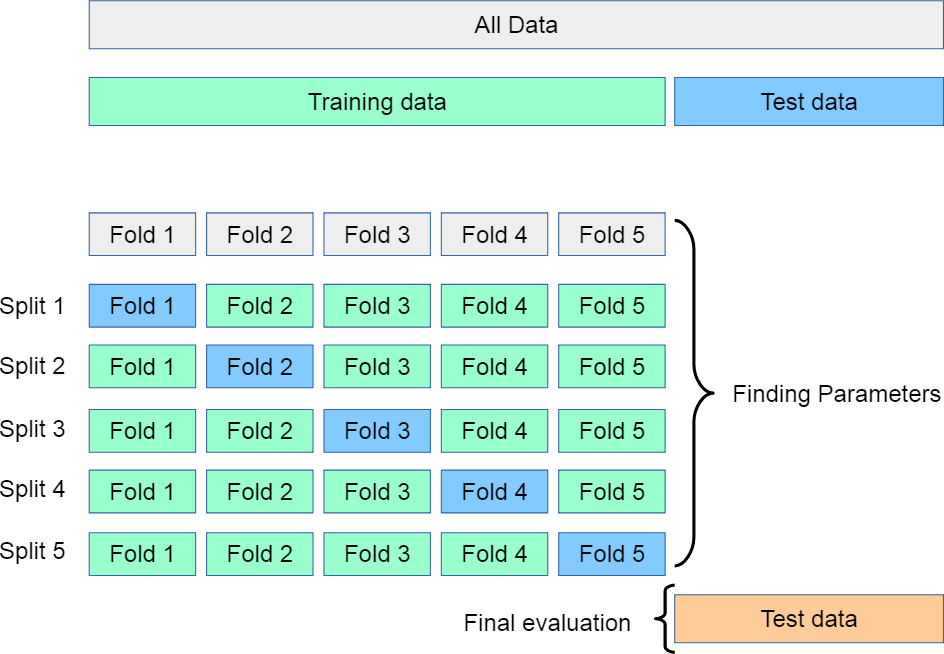

In [29]:
from sklearn.model_selection import cross_val_score
classifier_2=LogisticRegression()
score=cross_val_score(classifier_2,X_train,Y_train,cv=5)
score

array([0.76380952, 0.76190476, 0.77380952, 0.76809524, 0.78037161])

getting the mean score of all the fold

In [30]:
print(np.mean(score))


0.7695981306290978


importing the confusion matrix to find where our classifier fail to predict

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(prediction,Y_test)

array([[3176,  803],
       [ 253,  268]], dtype=int64)

we will be tunning our hyper parameter namely the regularization parameter using the gridsearchcv

In [32]:
from sklearn.model_selection import GridSearchCV

we can do hit and train base first chose the value of c from 0.01 t0 10 in a step of 10 then repeated the same step for the other value

In [33]:
parameter={'C':[0.0211,0.0222,0.0223,0.0224,0.0225,0.0226,0.0227]}
          

fitting the gridsearch

In [34]:
grid_search=GridSearchCV(estimator=classifier,param_grid=parameter,scoring='accuracy',cv=10)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0211, 0.0222, 0.0223, 0.0224, 0.0225, 0.0226, 0.0227]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

finding the best score for our regression

In [35]:
grid_search.best_score_

0.7880750547671207

we can clearly see that before applying grid search our score was 0.76 and after applying the grid search our score rise to 0.78 this is because of the regularization parameter

In [36]:
grid_search.best_params_

{'C': 0.0222}

In [38]:
predict=grid_search.predict(X_test)

In [39]:
confusion_matrix(predict,Y_test)

array([[3261,  807],
       [ 168,  264]], dtype=int64)

from confusion matrix we can see that there is drastic decrease in our false negative 

lets chech whether our model is suffer from high bias or varience inorder to check that we will be using the learning curve

In [40]:
from sklearn.model_selection import learning_curve

In [41]:
subset_size=np.exp(np.linspace(3,np.log(X_train.shape[0]/3),20)).astype(int)
subset_size

array([  20,   26,   34,   45,   59,   78,  102,  134,  176,  231,  303,
        398,  522,  685,  900, 1180, 1549, 2032, 2667, 3499])

In [42]:
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=7,shuffle=True)



In [43]:
train_sizes,train_scores,validation_scores=learning_curve(classifier,X_train,Y_train,train_sizes=subset_size,cv=fold,scoring='neg_mean_squared_error')

train_score or mean squared error for training data

In [44]:
print(train_scores)

[[-0.15       -0.1        -0.1        -0.15       -0.2        -0.2
  -0.2       ]
 [-0.11538462 -0.11538462 -0.11538462 -0.15384615 -0.15384615 -0.11538462
  -0.15384615]
 [-0.14705882 -0.14705882 -0.20588235 -0.11764706 -0.08823529 -0.20588235
  -0.11764706]
 [-0.15555556 -0.17777778 -0.13333333 -0.13333333 -0.15555556 -0.11111111
  -0.13333333]
 [-0.13559322 -0.20338983 -0.18644068 -0.20338983 -0.18644068 -0.18644068
  -0.18644068]
 [-0.20512821 -0.23076923 -0.21794872 -0.21794872 -0.25641026 -0.21794872
  -0.26923077]
 [-0.21568627 -0.23529412 -0.2254902  -0.23529412 -0.25490196 -0.21568627
  -0.2745098 ]
 [-0.17910448 -0.23880597 -0.20149254 -0.21641791 -0.21641791 -0.18656716
  -0.23134328]
 [-0.16477273 -0.21590909 -0.1875     -0.21022727 -0.20454545 -0.18181818
  -0.23295455]
 [-0.19047619 -0.1991342  -0.21212121 -0.19047619 -0.2034632  -0.18181818
  -0.22077922]
 [-0.20792079 -0.1980198  -0.19141914 -0.1980198  -0.19471947 -0.18811881
  -0.20132013]
 [-0.22613065 -0.22110553 -0

In [45]:
train_sizes

array([  20,   26,   34,   45,   59,   78,  102,  134,  176,  231,  303,
        398,  522,  685,  900, 1180, 1549, 2032, 2667, 3499])

getting the mean of the training score

In [46]:
train_score_mean=np.mean(train_scores,axis=1)*-1
train_score_mean

array([0.15714286, 0.13186813, 0.14705882, 0.14285714, 0.18401937,
       0.23076923, 0.23669468, 0.21002132, 0.19967532, 0.19975263,
       0.19707685, 0.2189519 , 0.22386426, 0.21835245, 0.23555556,
       0.23329298, 0.24550401, 0.24922666, 0.24045209, 0.23806802])

In [50]:
validation_score_mean=np.mean(validation_scores,axis=1)*-1
validation_score_mean


array([0.25641008, 0.28212716, 0.29726361, 0.30431021, 0.30212298,
       0.32212425, 0.25297611, 0.23297446, 0.22697477, 0.2235443 ,
       0.21497109, 0.2180189 , 0.21916385, 0.22402112, 0.23183217,
       0.23173706, 0.23602271, 0.23326023, 0.23068823, 0.23002163])

In [51]:
print('mean training score',pd.Series(train_score_mean,index=train_sizes))
print('mean validation error\n\n',pd.Series(validation_score_mean,index=train_sizes))

mean training score 20      0.157143
26      0.131868
34      0.147059
45      0.142857
59      0.184019
78      0.230769
102     0.236695
134     0.210021
176     0.199675
231     0.199753
303     0.197077
398     0.218952
522     0.223864
685     0.218352
900     0.235556
1180    0.233293
1549    0.245504
2032    0.249227
2667    0.240452
3499    0.238068
dtype: float64
mean validation error

 20      0.256410
26      0.282127
34      0.297264
45      0.304310
59      0.302123
78      0.322124
102     0.252976
134     0.232974
176     0.226975
231     0.223544
303     0.214971
398     0.218019
522     0.219164
685     0.224021
900     0.231832
1180    0.231737
1549    0.236023
2032    0.233260
2667    0.230688
3499    0.230022
dtype: float64


plotting the learning curve

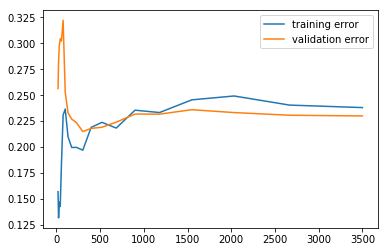

In [52]:
plt.plot(train_sizes,train_score_mean,label='training error')
plt.plot(train_sizes,validation_score_mean,label='validation error')
plt.legend()

from the learning curve its clear that we have the exact trade of between thte bias and the variance neither our model is suffering from bias nor variance

therefore we can predict the unseen data soundly.  
lets begin predicting the test data